In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('FuelConsumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
num_columns = [ "ENGINESIZE" , "CYLINDERS" , "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY" , "FUELCONSUMPTION_COMB" , "FUELCONSUMPTION_COMB_MPG" ]
cat_columns = ["MAKE" , "MODEL" , "VEHICLECLASS" , "TRANSMISSION" , "FUELTYPE"]
rules = [
    ("num_tag" , MinMaxScaler() ,num_columns),
    ("cat_tag", OneHotEncoder() ,cat_columns)
    ]

preprocessor = ColumnTransformer(rules)
x = preprocessor.fit_transform(data)
y = data["CO2EMISSIONS"]

In [7]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(x_test)

In [10]:
print("r2 score", r2_score(y_test, y_pred))

r2 score 0.974298814484959


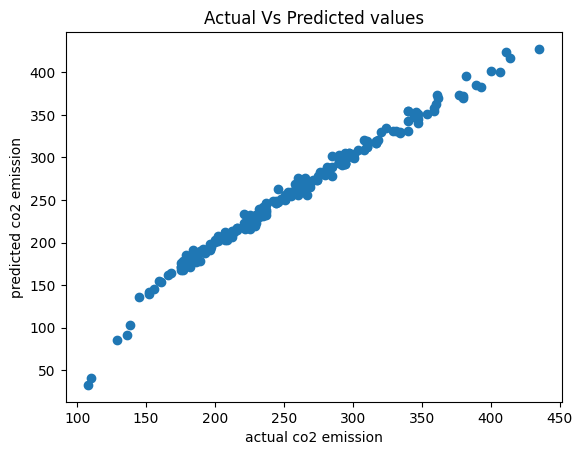

In [11]:
plt.scatter(y_test, y_pred)
plt.title("Actual Vs Predicted values")
plt.xlabel("actual co2 emission")
plt.ylabel("predicted co2 emission")
plt.show()